# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import src.size_estimator as size_estimator
import src.code_utils as code_utils
from src.graph_utils.reducers import multiplication_reductor
from src.graph_utils.plotters import plot_dag, plot_two_dimensional_dag
from src.graph_utils.utils import rename_verticies, rename_edges, \
                                  redirect_dag_to_new_sink,normalize_dag_edges 

In [2]:
import src.size_estimator as size_estimator
import pandas as pd
import numpy as np

# reading bistek sellout data
df = pd.read_csv("data/bistek.csv")

# filtering by month equals november
df = df[df["mês"] == "nov"]

# pos data enrichment
df_lojas = pd.read_csv("data/bistek_lojas.csv")
df = df.merge(df_lojas, on="loja")
df["loja_descricao"] = df.cidade + "-" +  df.bairro

# creating a store dictionary for translating store numbers to store descriptions
store_dictionary = {store_number: store_description for store_number, store_description \
                       in df[["loja", "loja_descricao"]].values}
    
# filtering valid eans
ean_is_valid_mask = df.ean.apply(lambda ean: str(ean).startswith("789"))
df = df[ean_is_valid_mask]

# pivoting data
df = df.groupby(["loja", "mês", "ean"]) \
    .aggregate({"venda_quantidade": np.nansum}) \
    .reset_index() \
    .groupby(["loja", "ean"]) \
    .aggregate({"venda_quantidade": np.nanmean}) \
    .reset_index()
df =  df.pivot_table(values="venda_quantidade", index="ean", columns="loja")

# marking zero sellout as NaN (because of zero division error)
df = df.applymap(lambda sellout: np.nan if sellout == 0 else sellout)

# creating a vertex dictionary for translating vertex numbers to store numbers
vertices_dictionary = {dag_vertex: dataframe_vertex for dag_vertex, dataframe_vertex \
                       in enumerate(df.columns)}
    
# separing values as an array for faster computing
arr = df.T.values

# DAG Creation

versão nova
versão nova
versão nova
versão nova
versão nova
versão nova
versão nova
versão nova
versão nova
versão nova
versão nova
versão nova
versão nova
versão nova
versão nova
versão nova
versão nova


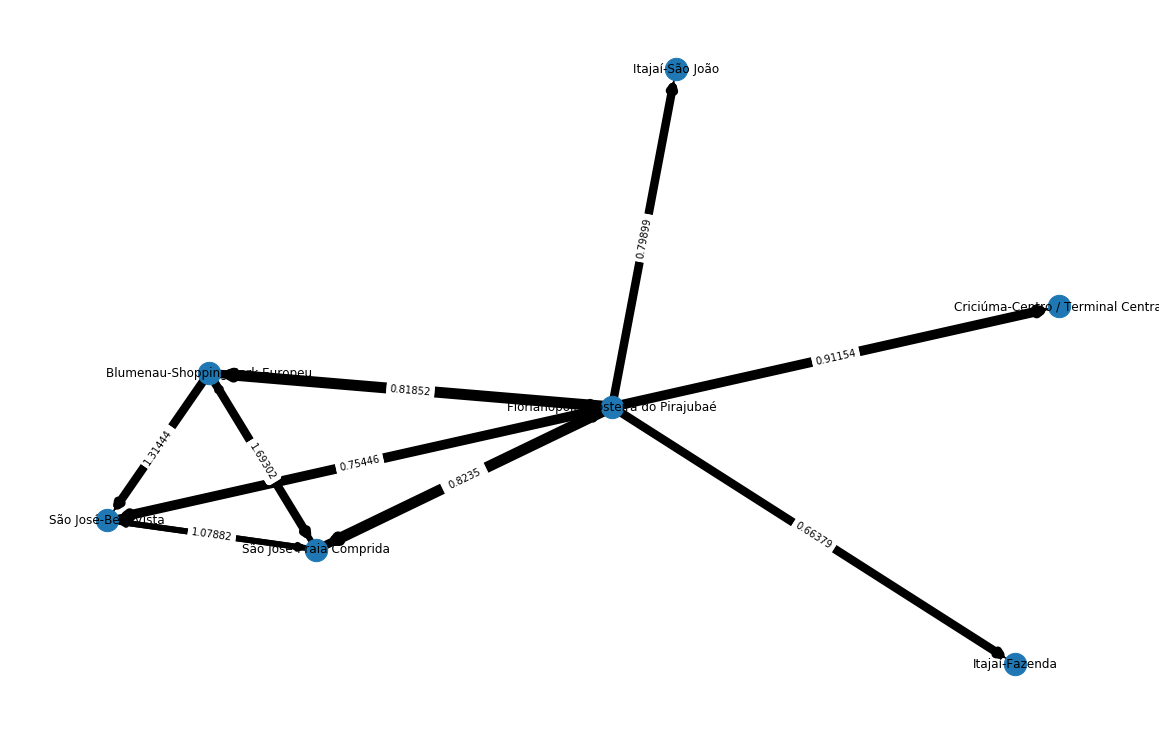

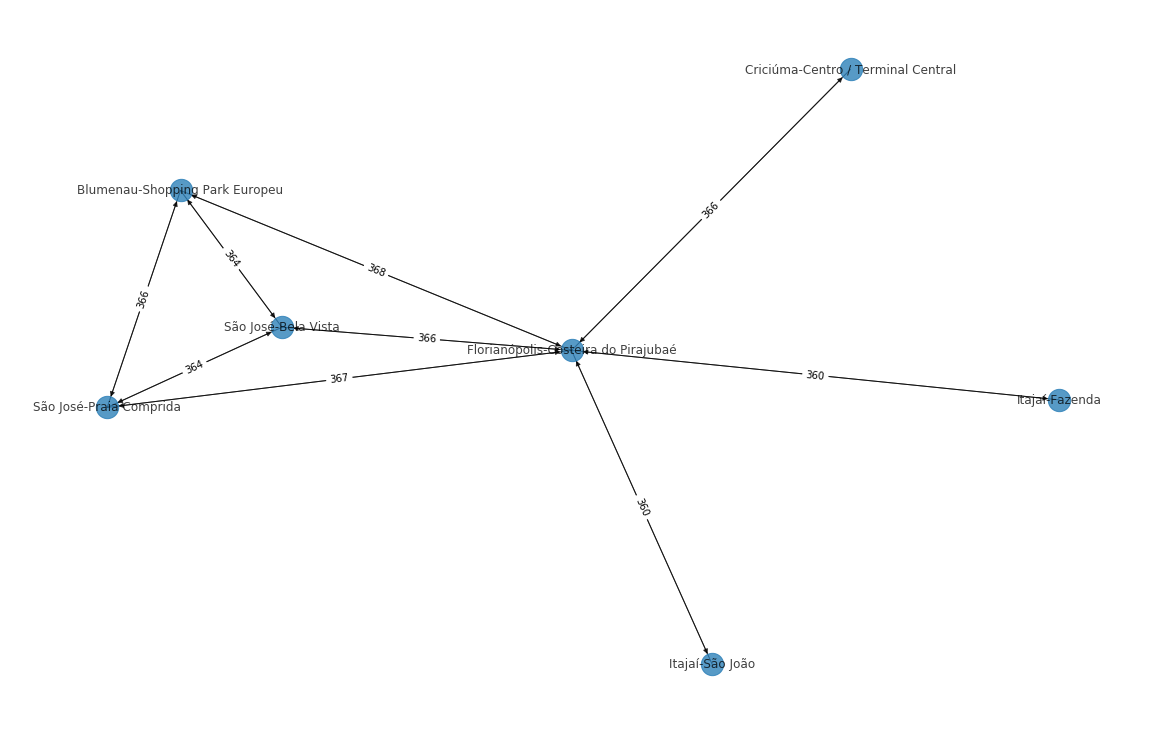

IndexError: list index out of range

In [3]:
# first dag    
dag = size_estimator.create_size_relationships_dag(arr, verbose=False)
options_dag = rename_edges(dag, code_utils.get_number_of_intersections(arr))
dag = rename_verticies(dag, vertices_dictionary)
dag = rename_verticies(dag, store_dictionary)


options_dag = rename_verticies(options_dag, vertices_dictionary)
options_dag = rename_verticies(options_dag, store_dictionary)
options_dag_normalized = normalize_dag_edges(options_dag, offset=1, scaling_factor=10)

plot_two_dimensional_dag(dag, options_dag_normalized)
plot_dag(rename_edges(dag, options_dag))

# minimal dag
minimal_dag = multiplication_reductor(dag)
plot_dag(minimal_dag)

# Testing

Reading tickets data:

In [ ]:
tickets_df = pd.read_excel("data/cupons_novembro_2019.xlsx", parse_dates=["Data"])
tickets_df = tickets_df.groupby("Loja").aggregate({"Quantidade de Cupons": "sum"})
tickets_df["Descrição Loja"] = [store_dictionary.get(store_number) for store_number in tickets_df.index]

In [ ]:
results = {}
for vertices, ratio in dag.items():
    vertex = vertices[0]
    
    reference_vertex = vertices[1]
    ticket_count_reference = tickets_df.loc[tickets_df["Descrição Loja"] == reference_vertex,
                                           "Quantidade de Cupons"].values[0]
    
    ticket_count_vertex = int(ratio * ticket_count_reference)
    
    results[vertex] = ticket_count_vertex
    
results[reference_vertex] = ticket_count_reference
tickets_df["Previsão"] = [results.get(loja) for loja in tickets_df["Descrição Loja"]]

In [ ]:
tickets_df

In [ ]:
tickets_df["MAPE"] = np.abs((tickets_df["Previsão"] - tickets_df["Quantidade de Cupons"])
                           / tickets_df["Quantidade de Cupons"])
tickets_df = tickets_df.sort_values(by="MAPE")
tickets_df.sort_values(by="Quantidade de Cupons")[["Descrição Loja", "Quantidade de Cupons"]]

In [ ]:
X = np.array(range(len(tickets_df)))
data = tickets_df[["Quantidade de Cupons", "Previsão"]].values

plt.figure(figsize=(6,12))
plt.barh(X, width=data[:, 0], color = 'b', height = 0.25, label="Tickets real")
plt.barh(X+0.25, width=data[:, 1], color = 'g', height = 0.25, label="Tickets previsto")

axes = plt.gca()
axes.set_yticks(list(range(len(tickets_df.index))))
axes.set_yticklabels([store_dictionary.get(store) for store in tickets_df.index])

plt.legend()
plt.show()

In [ ]:
tickets_df.MAPE.mean()

In [ ]:
(tickets_df["Quantidade de Cupons"] / tickets_df.at[10, "Quantidade de Cupons"]).index

# Error Analysis

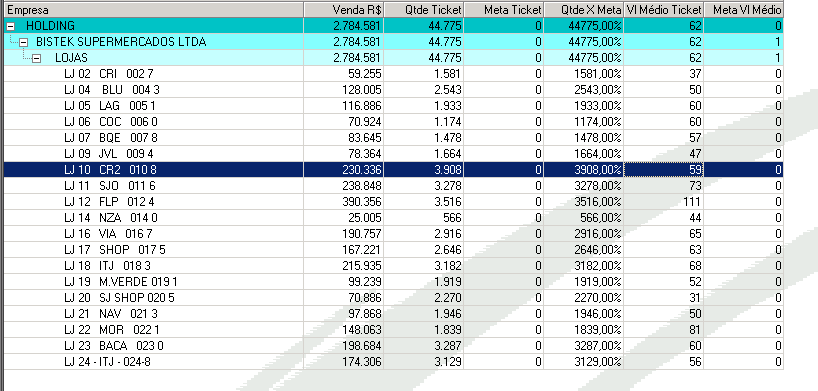

In [ ]:
mean_ticket_sellout = {
    2: 37,
    4: 50,
    5: 60,
    6: 60,
    7: 57,
    9: 47,
    10: 59,
    11: 73,
    12: 111,
    14: 44,
    16: 65,
    17: 63,
    18: 68,
    19: 52,
    20: 31,
    21: 50,
    22: 81,
    23: 60,
    24: 56
}

tickets_df["Ticket Médio"] = [mean_ticket_sellout.get(store_number) for store_number in tickets_df.index]

In [ ]:
def get_estimated_by(pointofsale):
    keys = options_dag.keys()
    selected_key = [k for k in keys if k[0] == pointofsale]
    if selected_key:
        return options_dag.get(selected_key[0])
    else:
        return 0
    

tickets_df["Options"] = [get_estimated_by(store_number) for store_number
                              in tickets_df["Descrição Loja"]]

In [ ]:
plt.scatter(tickets_df["Ticket Médio"], tickets_df["MAPE"], alpha=0.8)
plt.vlines(tickets_df["Ticket Médio"].mean(), 0, 1, label="Ticket médio")
plt.xlabel("Ticket Médio")
plt.ylabel("MAPE")
plt.legend()
plt.plot()

In [ ]:
plt.scatter(tickets_df["Options"], tickets_df["MAPE"], alpha=0.8)
plt.xlabel("Options")
plt.ylabel("MAPE")
plt.plot()